In [1]:
import torch
import torch.nn as nn # 인공 신경망 모델들 모아놓은 모듈
import torch.nn.functional as F #그중 자주 쓰이는것들을 F로
import torchvision.models as models
import torchvision.transforms
import torchaudio
import torchaudio.transforms as T
import librosa


from torchvision.models import ResNet
from torchvision.models import ResNet18_Weights,VGG16_BN_Weights

import timm

from torchvision.models.resnet import BasicBlock, ResNet
from dropblock import DropBlock2D, LinearScheduler

import torchvision.models as models
from torchvision.models.resnet import ResNet, BasicBlock


################################################################################
### WARNING, path does not exist: KALDI_ROOT=/mnt/matylda5/iveselyk/Tools/kaldi-trunk
###          (please add 'export KALDI_ROOT=<your_path>' in your $HOME/.profile)
###          (or run as: KALDI_ROOT=<your_path> python <your_script>.py)
################################################################################



In [23]:
res18 = models.resnet18(pretrained=True)

d:\anaconda3\envs\local_torch\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
d:\anaconda3\envs\local_torch\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [2]:
alexnet = models.alexnet(pretrained=True)

d:\anaconda3\envs\local_torch\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
d:\anaconda3\envs\local_torch\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
print(alexnet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [24]:
print(res18)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [27]:
res18.avgpool

AdaptiveAvgPool2d(output_size=(1, 1))

In [2]:
vgg16_bn = models.vgg16_bn(weights=VGG16_BN_Weights.IMAGENET1K_V1)

In [4]:
layer1=vgg16_bn.features[:6]
layer1_maxpool=vgg16_bn.features[6] 

#identity = nn.Identity()
#residual = identity(layer1_maxpool)

layer2=vgg16_bn.features[7:13]

layer2_maxpool=vgg16_bn.features[7:13] 


layer3=vgg16_bn.features[14:23]
layer3_maxpool=vgg16_bn.features[23] 

layer4=vgg16_bn.features[24:33]
layer4_maxpool=vgg16_bn.features[33] 

layer4=vgg16_bn.features[34:43]
layer4_maxpool=vgg16_bn.features[43] 



Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU(inplace=True)
  (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (9): ReLU(inplace=True)
  (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): ReLU(inplace=True)
  (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (14): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 

In [18]:
print(vgg16_bn)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [19]:
res = models.resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)

In [ ]:
res = models.resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)

In [20]:
print(res)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [4]:
res = models.vgg16_bn(weights=VGG16_BN_Weights.IMAGENET1K_V1,num_classes=1000)

In [14]:
res=nn.Sequential(*list(res.children())[:-1])

In [20]:
res = nn.Sequential(OrderedDict([
    ('cnn', res[0]),
    ('avg', res[1]),
]))

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU(inplace=True)
  (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (9): ReLU(inplace=True)
  (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): ReLU(inplace=True)
  (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (14): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 

In [ ]:
res = 

In [5]:
print(res)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [11]:
import pickle
class OpensmileData():
    
    opensmile_dict = dict()
    scaler_list = []

    def __init__(self,opensmile_path):
        #load
        with open(opensmile_path,"rb") as fr:
            OpensmileData.opensmile_dict = pickle.load(fr)
        return
    

In [13]:
dat=OpensmileData("../../../voice_data/all_data_ver2/smile_16000_all.pickle")

In [17]:
dat.opensmile_dict['1149-phrase.wav']

,audspec_lengthL1norm_sma_range,audspec_lengthL1norm_sma_maxPos,audspec_lengthL1norm_sma_minPos,audspec_lengthL1norm_sma_quartile1,audspec_lengthL1norm_sma_quartile2,audspec_lengthL1norm_sma_quartile3,audspec_lengthL1norm_sma_iqr1-2,audspec_lengthL1norm_sma_iqr2-3,audspec_lengthL1norm_sma_iqr1-3,audspec_lengthL1norm_sma_percentile1.0,...,mfcc_sma_de[14]_peakRangeAbs,mfcc_sma_de[14]_peakRangeRel,mfcc_sma_de[14]_peakMeanAbs,mfcc_sma_de[14]_peakMeanMeanDist,mfcc_sma_de[14]_peakMeanRel,mfcc_sma_de[14]_minRangeRel,mfcc_sma_de[14]_meanRisingSlope,mfcc_sma_de[14]_stddevRisingSlope,mfcc_sma_de[14]_meanFallingSlope,mfcc_sma_de[14]_stddevFallingSlope
0,1.343805,0.262712,0.567797,0.249011,0.40119,0.759817,0.152178,0.358628,0.510806,0.044974,...,11.094574,0.594181,3.886722,3.980559,-17.346561,0.476515,120.452591,70.490501,154.093704,76.921753


In [13]:

voice = torch.randn(1,1,32000)
#win_len=1024,n_fft=1024, hop_len=512

stft_scale = T.Spectrogram(
    n_fft=1024,
    win_length=1024,
    hop_length=512,
    center=True,
    pad_mode="constant",
    power=2.0,
)

stft_scale(voice).squeeze(1)[:,:229,:].size()


torch.Size([1, 229, 63])

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("C:/Users/USER/Desktop/trash/train_result_1.csv",index_col=0)
fail_df = pd.read_csv("C:/Users/USER/Desktop/trash/train_result_5.csv",index_col=0)

df

,0,1,2,3,4,5,6,7,8,9,...,7387,7388,7389,7390,7391,7392,7393,7394,7395,7396
0,0.893145,0.862903,0.000000,0.618952,0.592742,0.519153,0.534274,0.442540,0.457661,0.167339,...,0.022614,0.031100,0.021741,0.008214,0.014059,0.048338,0.024605,0.016433,0.035258,0.035377
1,0.849798,0.621976,0.330645,0.277218,0.210685,0.139113,0.299395,0.157258,0.160282,0.224798,...,0.038248,0.013375,0.023300,0.042292,0.015000,0.005693,0.025208,0.002669,0.019933,0.007947
2,0.711693,0.819557,0.000000,0.264113,0.326613,0.364919,0.581653,0.480847,0.498992,0.414314,...,0.060500,0.016583,0.020161,0.041263,0.008206,0.007660,0.036066,0.001730,0.014001,0.001760
3,0.904234,0.778730,0.813004,0.794355,0.622984,0.463710,0.286290,0.243952,0.208669,0.742943,...,0.037097,0.015278,0.037641,0.040711,0.031177,0.005236,0.041758,0.008184,0.024376,0.038378
4,0.795363,0.616935,0.418851,0.904234,0.866935,0.790323,0.614919,0.529234,0.544355,0.395161,...,0.069626,0.019085,0.024365,0.035428,0.025313,0.003465,0.040484,0.001446,0.024350,0.037845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,0.573589,0.719758,0.628528,0.899193,0.760081,0.840726,0.252016,0.866935,0.684476,0.560484,...,0.002054,0.059558,0.005816,0.008179,0.062663,0.039360,0.038758,0.015259,0.015062,0.043332
808,0.777218,0.334173,0.813004,0.355847,0.297379,0.506048,0.367944,0.785282,0.636089,0.574597,...,0.016540,0.034532,0.027060,0.017677,0.017484,0.036224,0.062912,0.019084,0.041138,0.022363
809,0.391129,0.166835,0.764113,0.542339,0.603831,0.727823,0.664315,0.807460,0.769153,0.589718,...,0.000775,0.044679,0.016917,0.015358,0.046945,0.041515,0.050430,0.009901,0.048970,0.069002
810,0.347782,0.727823,0.959677,0.345766,0.157258,0.322581,0.083669,0.678427,0.375000,0.760081,...,0.008562,0.051137,0.029903,0.035553,0.045845,0.026085,0.044923,0.007545,0.013652,0.061339


In [40]:
post_df = pd.read_csv("C:/Users/USER/Desktop/trash/post_train_result_1.csv",index_col=0)


In [33]:
fail_df

,0,1,2,3,4,5,6,7,8,9,...,6875,6876,6877,6878,6879,6880,6881,6882,6883,6884
0,0.217742,0.392137,0.750000,0.287298,0.414314,0.427419,0.676411,0.524193,0.573589,0.130040,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.256474,1.231765,1.280433,0.695409,1.186413
1,0.140121,0.771169,0.598790,0.226815,0.187500,0.517137,0.301411,0.888105,0.734879,0.790323,...,1.065342,1.051324,0.227934,1.041802,0.536224,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.550403,0.084677,0.718750,0.100806,0.554435,0.707661,0.935484,0.814516,0.921371,0.280242,...,1.073527,1.189197,0.000000,0.885954,0.188042,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.558468,0.750504,0.643145,0.445564,0.394153,0.211694,0.430444,0.089718,0.157258,0.081653,...,0.633356,0.601872,0.932129,0.759242,0.963308,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.286290,0.725807,0.646169,0.393145,0.223790,0.038306,0.160282,0.010081,0.012097,0.219758,...,0.984688,0.879261,0.521479,0.995056,0.738736,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,0.910282,0.408266,0.570565,0.562500,0.580645,0.832661,0.597782,0.934476,0.872984,0.439516,...,0.769370,0.657464,0.789642,0.896552,0.967313,0.000000,0.000000,0.000000,0.000000,0.000000
806,0.933468,0.228831,0.000000,0.110887,0.091734,0.306452,0.315524,0.756048,0.574597,0.041331,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.282534,1.337287,1.364106,0.600684,1.222818
807,0.055444,0.213710,0.970766,0.333669,0.173387,0.182460,0.121976,0.336694,0.185484,0.633065,...,0.000000,0.000000,0.311945,0.000000,0.000000,0.517108,0.610984,0.524882,0.673067,0.674888
808,0.587702,0.881048,0.452621,0.785282,0.627016,0.741935,0.310484,0.800403,0.623992,0.432460,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.761779,0.643471,0.712812,0.696954,0.873210


In [34]:
fail_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,6875,6876,6877,6878,6879,6880,6881,6882,6883,6884
count,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,...,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000
mean,0.503114,0.503445,0.465135,0.510058,0.508303,0.506633,0.501600,0.500895,0.501047,0.504258,...,0.437024,0.411585,0.303610,0.455520,0.385502,0.451205,0.445081,0.472503,0.332159,0.469288
std,0.291735,0.287641,0.339557,0.288950,0.287544,0.287886,0.291192,0.289462,0.289815,0.291457,...,0.474706,0.467105,0.367303,0.471480,0.426724,0.524119,0.511813,0.543783,0.337735,0.510594
min,0.000000,0.001008,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.248236,0.255292,0.000000,0.261341,0.269405,0.267389,0.250252,0.254284,0.248236,0.252268,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.505040,0.510081,0.513357,0.512601,0.507561,0.505544,0.509073,0.501512,0.503528,0.506552,...,0.202932,0.217600,0.083902,0.258123,0.129146,0.000000,0.000000,0.004865,0.125706,0.041778
75%,0.755796,0.751638,0.752772,0.760837,0.755796,0.748740,0.751764,0.751764,0.748740,0.757560,...,0.835175,0.758982,0.590542,0.900068,0.810813,0.879793,0.877768,0.921174,0.662144,0.923072
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.327151,2.474776,1.260449,1.829876,1.228671,2.197326,2.110722,2.447684,1.035482,1.872196


In [45]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,7387,7388,7389,7390,7391,7392,7393,7394,7395,7396
count,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,...,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000
mean,0.499382,0.495268,0.474686,0.497133,0.498156,0.499742,0.504038,0.501745,0.503456,0.498904,...,0.030796,0.023785,0.022942,0.029040,0.027195,0.023799,0.026599,0.021480,0.026803,0.025589
std,0.288251,0.291251,0.336338,0.293871,0.289526,0.292282,0.288286,0.290206,0.289264,0.286041,...,0.028756,0.015894,0.018137,0.021046,0.020156,0.020507,0.014882,0.018581,0.020059,0.021085
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001008,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000015,0.000207,0.000000,0.000000
25%,0.254536,0.246094,0.000000,0.242692,0.247984,0.238659,0.251764,0.257812,0.251512,0.253780,...,0.008787,0.010715,0.007671,0.012285,0.010914,0.004897,0.015195,0.008294,0.009932,0.006871
50%,0.495464,0.485887,0.524698,0.489919,0.492440,0.501512,0.507561,0.500504,0.512601,0.492440,...,0.021586,0.022041,0.019640,0.024579,0.021838,0.021306,0.025107,0.015630,0.024378,0.020731
75%,0.755544,0.745338,0.765373,0.755292,0.746220,0.755292,0.756300,0.750252,0.752268,0.748236,...,0.046987,0.034948,0.034241,0.040632,0.041084,0.038340,0.036739,0.030114,0.039752,0.040214
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.160401,0.087380,0.081450,0.121576,0.102937,0.102485,0.093560,0.112825,0.125459,0.088846


In [41]:
post_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,7387,7388,7389,7390,7391,7392,7393,7394,7395,7396
count,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,...,8.120000e+02,8.120000e+02,8.120000e+02,8.120000e+02,8.120000e+02,8.120000e+02,8.120000e+02,8.120000e+02,8.120000e+02,8.120000e+02
mean,0.499382,0.495268,0.474686,0.497133,0.498156,0.499742,0.504038,0.501745,0.503456,0.498904,...,-4.786217e-02,-5.615479e-03,-2.363310e-01,5.811823e-09,-2.567055e-02,-4.029922e-02,-2.925715e-02,-5.615479e-03,-2.213869e-02,-2.674706e-03
std,0.288251,0.291251,0.336338,0.293871,0.289526,0.292282,0.288286,0.290206,0.289264,0.286041,...,1.188690e+00,1.047259e+00,1.632042e+00,1.025263e+00,1.118179e+00,1.165402e+00,1.130049e+00,1.047259e+00,1.106284e+00,1.035948e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001008,...,-5.199338e+00,-5.199338e+00,-5.199338e+00,-5.199338e+00,-5.199338e+00,-5.199338e+00,-5.199338e+00,-5.199338e+00,-5.199338e+00,-5.199338e+00
25%,0.254536,0.246094,0.000000,0.242692,0.247984,0.238659,0.251764,0.257812,0.251512,0.253780,...,-6.744907e-01,-6.744907e-01,-6.744907e-01,-6.744907e-01,-6.744907e-01,-6.744907e-01,-6.744907e-01,-6.744907e-01,-6.744907e-01,-6.744907e-01
50%,0.495464,0.485887,0.524698,0.489919,0.492440,0.501512,0.507561,0.500504,0.512601,0.492440,...,3.730000e-08,3.730000e-08,3.730000e-08,3.730000e-08,3.730000e-08,3.730000e-08,3.730000e-08,3.730000e-08,3.730000e-08,3.730000e-08
75%,0.755544,0.745338,0.765373,0.755292,0.746220,0.755292,0.756300,0.750252,0.752268,0.748236,...,6.744907e-01,6.744907e-01,6.744907e-01,6.744907e-01,6.744907e-01,6.744907e-01,6.744907e-01,6.744907e-01,6.744907e-01,6.744907e-01
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.199338e+00,5.199338e+00,5.199338e+00,5.199338e+00,5.199338e+00,5.199338e+00,5.199338e+00,5.199338e+00,5.199338e+00,5.199338e+00


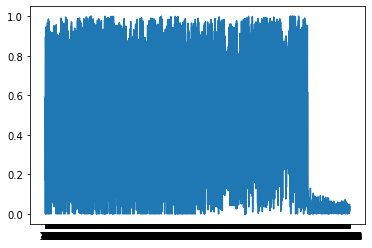

In [46]:
plt.plot(df.loc[0])

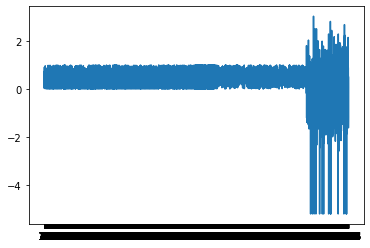

In [39]:
plt.plot(post_df.loc[0])

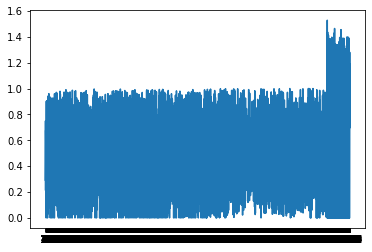

In [29]:
plt.plot(fail_df.loc[0])

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("C:/Users/USER/Desktop/trash/post_train_result_4.csv",index_col=0)
fail_df = pd.read_csv("C:/Users/USER/Desktop/trash/post_train_result_5.csv",index_col=0)

df

,0,1,2,3,4,5,6,7,8,9,...,6875,6876,6877,6878,6879,6880,6881,6882,6883,6884
0,0.014135,-0.782935,-1.299339,-0.455378,0.637046,0.241520,1.308213,-0.359470,0.700428,0.552503,...,1.446965,1.313414,-0.966745,-0.977276,-0.849760,1.490440,-0.975897,-0.937010,1.282271,1.433959
1,1.000751,1.167118,0.571791,1.242285,1.628926,1.524719,1.631924,0.649334,1.483694,0.705519,...,0.942002,0.976194,-0.966745,-0.977276,-0.849760,0.953796,-0.975897,-0.937010,0.990164,0.955038
2,-1.375465,-1.078398,-1.299339,1.112236,0.132467,-0.147223,-1.465959,-0.390778,-1.094845,0.500339,...,-0.940750,-0.968222,0.720689,0.704066,0.238532,-0.949676,0.796855,0.604403,-0.965974,-0.950184
3,0.424067,-1.615444,-0.349677,0.012095,0.737271,1.559121,1.182905,1.706839,1.670846,0.375144,...,-0.940750,-0.968222,1.000250,0.913060,0.867714,-0.949676,1.011215,1.052386,-0.965974,-0.950184
4,-0.364531,0.449318,-1.299339,0.613131,-0.527634,-0.852466,-1.570382,-1.041283,-1.444889,1.512329,...,0.613706,0.734872,-0.966745,-0.977276,-0.849760,0.654546,-0.975897,-0.937010,0.713076,0.618623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,1.257827,-1.354742,1.629774,0.686942,1.604733,1.600403,1.670213,1.338104,1.656983,-0.675100,...,-0.940750,-0.968222,0.025246,0.287591,-0.462908,-0.949676,0.098837,0.199356,-0.965974,-0.950184
810,1.021595,-0.444022,-0.414967,-0.332359,-0.213136,0.148635,0.263982,0.725864,0.502879,-0.191710,...,-0.940750,-0.968222,0.488109,0.670632,-0.055217,-0.949676,0.496772,0.334380,-0.965974,-0.950184
811,-1.125337,-1.100992,0.861141,-1.474679,-1.471129,-1.079520,-0.466979,0.322342,-0.107099,-0.796817,...,1.593018,1.448783,-0.966745,-0.977276,-0.849760,1.542101,-0.975897,-0.937010,1.476128,1.516213
812,-0.340213,-0.736009,0.435277,-0.153102,-0.154383,-0.202267,0.107348,-0.077701,-0.082838,1.338447,...,1.666321,1.442937,-0.966745,-0.977276,-0.849760,1.560717,-0.975897,-0.937010,1.485586,1.543370


In [35]:
fail_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,6875,6876,6877,6878,6879,6880,6881,6882,6883,6884
count,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,...,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02
mean,-1.301333e-08,-1.507914e-08,-3.127407e-08,-7.510247e-09,3.803210e-10,2.273704e-09,1.277926e-08,-9.867654e-10,-1.107404e-08,-1.271370e-08,...,5.720988e-09,2.179383e-08,-1.623188e-08,-4.938273e-11,-2.391580e-08,-1.080321e-08,4.300000e-08,-5.570123e-09,1.085185e-08,-2.032395e-08
std,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,...,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00
min,-1.725625e+00,-1.747827e+00,-1.370676e+00,-1.766302e+00,-1.768835e+00,-1.760930e+00,-1.723642e+00,-1.731505e+00,-1.729916e+00,-1.731193e+00,...,-9.211884e-01,-8.816850e-01,-8.271040e-01,-9.667460e-01,-9.039562e-01,-8.614139e-01,-8.701534e-01,-8.694546e-01,-9.840978e-01,-9.196687e-01
25%,-8.742031e-01,-8.632481e-01,-1.370676e+00,-8.612943e-01,-8.313371e-01,-8.315524e-01,-8.637046e-01,-8.524892e-01,-8.728558e-01,-8.651179e-01,...,-9.211884e-01,-8.816850e-01,-8.271040e-01,-9.667460e-01,-9.039562e-01,-8.614139e-01,-8.701534e-01,-8.694546e-01,-9.840978e-01,-9.196687e-01
50%,6.607746e-03,2.308403e-02,1.421020e-01,8.804755e-03,-2.585458e-03,-3.784912e-03,2.567631e-02,2.133888e-03,8.567960e-03,7.878780e-03,...,-4.934338e-01,-4.155500e-01,-5.985356e-01,-4.189349e-01,-6.011235e-01,-8.614139e-01,-8.701534e-01,-8.605030e-01,-6.116651e-01,-8.377951e-01
75%,8.666733e-01,8.633898e-01,8.476195e-01,8.684312e-01,8.612457e-01,8.415014e-01,8.596335e-01,8.672109e-01,8.551870e-01,8.696276e-01,...,8.392482e-01,7.441816e-01,7.816695e-01,9.434590e-01,9.973060e-01,8.182366e-01,8.459238e-01,8.256018e-01,9.776609e-01,8.892875e-01
max,1.704265e+00,1.727366e+00,1.576159e+00,1.696640e+00,1.711045e+00,1.714818e+00,1.712643e+00,1.725319e+00,1.722689e+00,1.701959e+00,...,3.984137e+00,4.419701e+00,2.606654e+00,2.916781e+00,1.977134e+00,3.333593e+00,3.256407e+00,3.634537e+00,2.083762e+00,2.749297e+00


In [36]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,6875,6876,6877,6878,6879,6880,6881,6882,6883,6884
count,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,...,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02
mean,8.807371e-09,3.528993e-09,-3.740737e-08,-4.555528e-09,7.028870e-09,1.060946e-08,2.466953e-09,-8.932064e-09,-1.074201e-08,-3.105319e-09,...,1.971314e-08,2.965602e-08,1.533907e-08,2.842752e-08,2.025037e-08,-7.648649e-09,-3.058968e-09,-6.104975e-09,-1.171376e-08,1.163268e-08
std,1.000615e+00,1.000615e+00,1.000615e+00,1.000615e+00,1.000615e+00,1.000615e+00,1.000615e+00,1.000615e+00,1.000615e+00,1.000615e+00,...,1.000615e+00,1.000615e+00,1.000615e+00,1.000615e+00,1.000615e+00,1.000615e+00,1.000615e+00,1.000615e+00,1.000615e+00,1.000615e+00
min,-1.698547e+00,-1.723201e+00,-1.299339e+00,-1.713687e+00,-1.695770e+00,-1.678117e+00,-1.733978e+00,-1.705702e+00,-1.708288e+00,-1.701001e+00,...,-9.407500e-01,-9.682217e-01,-9.667448e-01,-9.772764e-01,-8.497595e-01,-9.496757e-01,-9.758971e-01,-9.370097e-01,-9.659740e-01,-9.501840e-01
25%,-8.873681e-01,-8.711395e-01,-1.299339e+00,-8.648554e-01,-8.689164e-01,-8.791279e-01,-8.629162e-01,-8.803960e-01,-8.687034e-01,-8.794108e-01,...,-9.407500e-01,-9.682217e-01,-9.667448e-01,-9.772764e-01,-8.497595e-01,-9.496757e-01,-9.758971e-01,-9.370097e-01,-9.659740e-01,-9.501840e-01
50%,-2.060496e-02,-8.284392e-04,9.325084e-02,-2.656849e-02,-1.959825e-02,-7.894699e-03,-9.257815e-03,-6.388870e-03,-1.525536e-02,8.254043e-03,...,-5.009558e-01,-3.623802e-01,-6.875436e-01,-5.764382e-01,-8.497595e-01,-4.586261e-01,-5.663117e-01,-8.235892e-01,-4.227716e-01,-4.546947e-01
75%,8.643966e-01,8.633995e-01,8.633671e-01,8.495029e-01,8.781042e-01,8.943004e-01,8.644151e-01,8.467465e-01,8.901793e-01,8.707061e-01,...,9.122676e-01,9.516633e-01,9.544703e-01,9.551997e-01,8.180077e-01,9.072875e-01,9.555791e-01,9.228165e-01,9.446172e-01,9.041162e-01
max,1.747661e+00,1.725021e+00,1.644612e+00,1.773024e+00,1.732606e+00,1.734572e+00,1.718943e+00,1.745104e+00,1.729764e+00,1.741852e+00,...,3.013247e+00,2.483068e+00,2.368831e+00,2.249022e+00,3.937368e+00,2.867275e+00,2.016461e+00,3.084838e+00,2.553179e+00,2.827470e+00


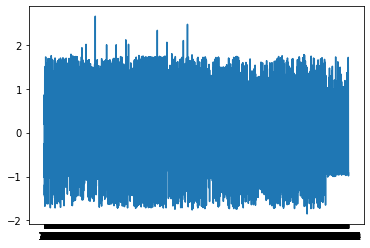

In [37]:
plt.plot(fail_df.loc[3])

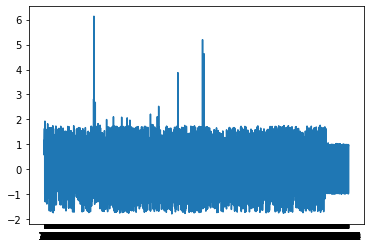

In [38]:
plt.plot(df.loc[1])

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("C:/Users/USER/Desktop/trash/post_train_result_1.csv",index_col=0)
fail_df = pd.read_csv("C:/Users/USER/Desktop/trash/post_train_result_5.csv",index_col=0)

df

,0,1,2,3,4,5,6,7,8,9,...,6875,6876,6877,6878,6879,6880,6881,6882,6883,6884
0,0.436492,0.095766,0.319556,0.527218,0.527218,0.607863,0.567540,0.718750,0.648185,0.516129,...,0.577458,0.489562,0.685285,0.000000,0.438608,0.341650,0.470123,0.317566,0.000000,0.000000
1,0.792339,0.595766,0.943548,0.284274,0.551411,0.780242,0.824597,0.904234,0.904234,0.656250,...,0.418136,0.299697,0.567459,0.000000,0.404489,0.371624,0.250323,0.380097,0.000000,0.000000
2,0.755040,0.480847,0.000000,0.632057,0.835685,0.689516,0.869960,0.344758,0.662298,0.716734,...,0.000000,0.000000,0.000000,0.780606,0.000000,0.000000,0.000000,0.000000,0.726965,0.844047
3,0.737903,0.591734,0.403730,0.252016,0.103831,0.112903,0.082661,0.289314,0.142137,0.665323,...,0.573748,0.424623,0.561533,0.000000,0.407832,0.239863,0.399557,0.211791,0.000000,0.000000
4,0.623992,0.795363,0.747984,0.029234,0.442540,0.897177,0.957661,0.987903,0.990927,0.187500,...,0.000000,0.000000,0.000000,0.636193,0.000000,0.000000,0.000000,0.000000,0.624336,0.677300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,0.495968,0.677419,0.655242,0.825605,0.617943,0.664315,0.189516,0.687500,0.448589,0.934476,...,0.451465,0.399775,0.594659,0.000000,0.364401,0.206523,0.359349,0.152774,0.000000,0.000000
808,0.200605,0.504536,0.872984,0.944557,0.839718,0.772177,0.210685,0.583669,0.385081,0.899193,...,0.000000,0.000000,0.000000,0.774892,0.000000,0.000000,0.000000,0.000000,0.832512,0.835954
809,0.132056,0.822581,0.643145,0.610887,0.350806,0.377016,0.097782,0.469758,0.239919,0.454637,...,0.409633,0.307219,0.448232,0.000000,0.296652,0.100530,0.276137,0.092823,0.000000,0.000000
810,0.925403,0.451613,0.939516,0.888105,0.903226,0.911290,0.794355,0.832661,0.847782,0.640121,...,0.000000,0.000000,0.000000,0.867127,0.000000,0.000000,0.000000,0.000000,0.915085,0.882732


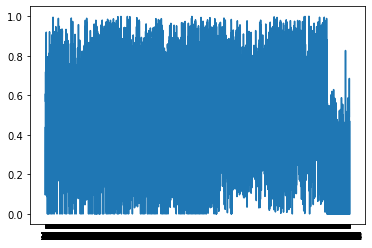

In [48]:
plt.plot(df.loc[0])

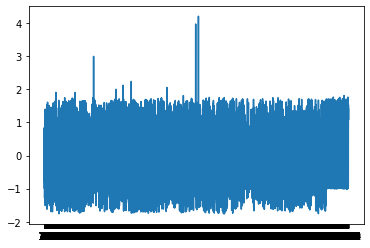

In [44]:
plt.plot(fail_df.loc[0])

In [80]:
import librosa
import numpy as np
from scipy import signal
import numpy as np
import librosa, librosa.display 

# 3. Extract Rolloff
def extract_rolloff(audio_path):
    y, sr = librosa.load(audio_path)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    return rolloff

# 4. Extract ZCR (Zero-Crossing Rate)
def extract_zcr(audio_path):
    y, sr = librosa.load(audio_path)
    zcr = librosa.feature.zero_crossing_rate(y)
    return zcr


def extract_energy_entropy(audio_path):
    # Load the audio signal
    y, sr = librosa.load(audio_path)

    # 음성 신호에서 에너지를 계산합니다.
    energy = np.sum(y ** 2)

    # 에너지 분포의 불확실성의 척도로 에너지 엔트로피를 계산합니다.
    entropy = -np.sum(energy * np.log2(energy))

    return entropy

# 6. Extract Spectral Flux
def extract_spectral_flux(audio_path):
    y, sr = librosa.load(audio_path)
    spectral_flux = librosa.onset.onset_strength(y=y, sr=sr)
    return spectral_flux

# 7. Extract Spectral Centroid
def extract_spectral_centroid(audio_path):
    y, sr = librosa.load(audio_path)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    return spectral_centroid

# 8. Extract Energy
def extract_energy(audio_path):
    y, sr = librosa.load(audio_path)
    energy = librosa.feature.rms(y=y)
    return energy

def detrended_fluctuation_analysis(audio_path, window_size):
    """
    Calculate the detrended fluctuation analysis (DFA) of the time series.

    Args:
    time_series: The time series.
    window_size: The size of the windows.

    Returns:
    A list of the DFA exponents.
    """

    # Remove the trend from the time series.
    time_series, sr = librosa.load(audio_path)
    trend = signal.detrend(time_series)
    print(trend.shape)

    # Divide the time series into windows.
    windows = np.array_split(trend, window_size)
    #print(windows)
    #print(windows.shape)
    #print(windows)
    # Calculate the standard deviation of each window.
    standard_deviations = [np.std(window) for window in windows ]

    # Return the list of DFA exponents.
    return np.log(standard_deviations) / np.log(window_size)

def teager_energy(audio_path):
    """
    Computes the Teager energy operator of the signal.

    Args:
    signal: The signal to compute the Teager energy operator for.

    Returns:
    The Teager energy operator of the signal.
    """
    signal, sr = librosa.load(audio_path)
    # Compute the first and second derivatives of the signal.
    d1 = np.gradient(signal)
    d2 = np.gradient(d1)

    # Compute the Teager energy operator.
    teager_energy = np.square(d1) + d2*signal

    return teager_energy


# Example usage
audio_file = '../../../voice_data/all_data_ver2/healthy/a/high/export/1-a_h.wav'

rolloff_features = extract_rolloff(audio_file)
zcr_features = extract_zcr(audio_file)
energy_entropy = extract_energy_entropy(audio_file)
spectral_flux_features = extract_spectral_flux(audio_file)
spectral_centroid_features = extract_spectral_centroid(audio_file)
energy_features = extract_energy(audio_file)



dfa = detrended_fluctuation_analysis(audio_file, 1024) #1024사이즈
teager_energy(audio_file).shape


(43958,)


(43958,)

In [83]:
raw_audio

array([-0.07600509, -0.13046828, -0.12929411, ..., -0.41186512,
       -0.32328   ,  0.        ], dtype=float32)

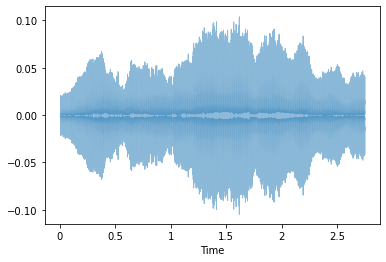

In [86]:

raw_audio = librosa.load(audio_file,sr=16000)[0]
librosa.display.waveshow(teager_energy(audio_file), sr=16000, alpha=0.5)
#librosa.display.waveshow(raw_audio, sr=16000, )

In [52]:
y, sr = librosa.load(audio_file)
signal.detrend(y).shape

(43958,)

In [44]:
dfa

array([], dtype=float32)

In [23]:
print(rolloff_features.shape,
      zcr_features.shape,
      energy_entropy.shape,
      spectral_flux_features.shape,
      spectral_centroid_features.shape,
      energy_features.shape)

(1, 86) (1, 86) () (86,) (1, 86) (1, 86)


In [30]:
zcr_features

array([[0.03320312, 0.04980469, 0.06640625, 0.06640625, 0.06689453,
        0.06738281, 0.06738281, 0.06787109, 0.06738281, 0.06738281,
        0.06787109, 0.06787109, 0.06835938, 0.06787109, 0.06787109,
        0.06787109, 0.06787109, 0.06835938, 0.06835938, 0.06787109,
        0.06738281, 0.06689453, 0.06689453, 0.06689453, 0.06738281,
        0.06787109, 0.06738281, 0.06787109, 0.06738281, 0.06738281,
        0.06738281, 0.06738281, 0.06787109, 0.06738281, 0.06787109,
        0.06738281, 0.06738281, 0.06787109, 0.06738281, 0.06787109,
        0.06787109, 0.06787109, 0.06738281, 0.06787109, 0.06738281,
        0.06738281, 0.06787109, 0.06738281, 0.06787109, 0.06787109,
        0.06787109, 0.06787109, 0.06738281, 0.06689453, 0.06689453,
        0.06689453, 0.06738281, 0.06787109, 0.06835938, 0.06835938,
        0.06835938, 0.06787109, 0.06787109, 0.06738281, 0.06738281,
        0.06787109, 0.06787109, 0.06835938, 0.06835938, 0.06787109,
        0.06787109, 0.06787109, 0.06738281, 0.06

In [ ]:
mel = librosa.filters.mel(sr=sr, n_fft=frame_length,n_mels=n_mels)
plt.plot(mle)